In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:

from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number 
from pyspark.sql.window import Window

In [0]:
from pyspark.sql import SparkSession

# create session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:

ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])
     

In [0]:
Ball_by_Ball_df = spark.read.format("csv").option("header","true").option("inferschema","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

In [0]:
Ball_by_Ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|Fielder_match_SK|Fi

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Match.csv")


In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player.csv")

     

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player_match.csv")

     

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")
     

In [0]:

# Filter to include only valid deliveries (excluding extras like wides and no balls for specific analyses)
Ball_by_Ball_df  = Ball_by_Ball_df.filter((col("wides") == 0) & (col("noballs")==0))
# Aggregation: Calculate the total and average runs scored in each match and inning
total_and_avg_runs = Ball_by_Ball_df.groupby("match_id","innings_no").agg(
    sum("runs_scored").alias("Total runs"),
    avg("runs_scored").alias("Average runs")
)

In [0]:
Ball_by_Ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|Fielder_match_SK|Fi

In [0]:
# Window Function: Calculate running total of runs in each match for each over
windowspec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

Ball_by_Ball_df = Ball_by_Ball_df.withColumn(
    "running_total_runs",sum("runs_scored").over(windowspec)
)

In [0]:

# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
Ball_by_Ball_df = Ball_by_Ball_df.withColumn(
    "high impact",
    when((col("runs_scored") + col("Extra_runs") > 6) | (col("bowler_wicket") == True),True).otherwise(False)
)

In [0]:
Ball_by_Ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NO

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when


# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year",year("match_date"))
match_df = match_df.withColumn("month",month("match_date"))
match_df = match_df.withColumn("day",dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)


# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",when(col("toss_winner")==col("match_winner"),"yes").otherwise("no")
)

# Show the enhanced match DataFrame
match_df.show(2)



+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import lower,regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))
# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand":"unknown","bowling_skill":"unknown"})
# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",when(col("batting_hand").contains("left"),"left-Handed").otherwise("Right-Handed")
)
# Show the modified player DataFrame
player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:

from pyspark.sql.functions import col, when

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------

In [0]:

Ball_by_Ball_df.createOrReplaceTempView("Ball_by_Ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
Ball_by_Ball_df.columns

Out[23]: ['MatcH_id',
 'Over_id',
 'Ball_id',
 'Innings_No',
 'Team_Batting',
 'Team_Bowling',
 'Striker_Batting_Position',
 'Extra_Type',
 'Runs_Scored',
 'Extra_runs',
 'Wides',
 'Legbyes',
 'Byes',
 'Noballs',
 'Penalty',
 'Bowler_Extras',
 'Out_type',
 'Caught',
 'Bowled',
 'Run_out',
 'LBW',
 'Retired_hurt',
 'Stumped',
 'caught_and_bowled',
 'hit_wicket',
 'ObstructingFeild',
 'Bowler_Wicket',
 'Match_Date',
 'Season',
 'Striker',
 'Non_Striker',
 'Bowler',
 'Player_Out',
 'Fielders',
 'Striker_match_SK',
 'StrikerSK',
 'NonStriker_match_SK',
 'NONStriker_SK',
 'Fielder_match_SK',
 'Fielder_SK',
 'Bowler_match_SK',
 'BOWLER_SK',
 'PlayerOut_match_SK',
 'BattingTeam_SK',
 'BowlingTeam_SK',
 'Keeper_Catch',
 'Player_out_sk',
 'MatchDateSK',
 'running_total_runs',
 'high impact']

In [0]:
top_scoring_batsmen_per_season = spark.sql(""" 
select
p.player_name,m.season_year,sum(b.runs_scored) as total_runs
from Ball_by_Ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON m.match_id = pm.match_id and b.striker = pm.player_id
JOIN player p ON p.player_id = pm.player_id
group by p.player_name,m.season_year
order by m.season_year,total_runs desc
""")

In [0]:
top_scoring_batsmen_per_season.show(30)

+---------------+-----------+----------+
|    player_name|season_year|total_runs|
+---------------+-----------+----------+
|       se marsh|       2008|       614|
|      g gambhir|       2008|       532|
|  st jayasuriya|       2008|       508|
|      sr watson|       2008|       463|
|       gc smith|       2008|       437|
|   ac gilchrist|       2008|       431|
|      yk pathan|       2008|       430|
|       sk raina|       2008|       420|
|       ms dhoni|       2008|       414|
|       v sehwag|       2008|       399|
|      rg sharma|       2008|       399|
|       r dravid|       2008|       370|
|     sc ganguly|       2008|       349|
|       s dhawan|       2008|       340|
|  kc sangakkara|       2008|       319|
|      dj hussey|       2008|       318|
|     rv uthappa|       2008|       316|
|    sa asnodkar|       2008|       311|
|   yuvraj singh|       2008|       299|
|       pa patel|       2008|       297|
|y venugopal rao|       2008|       283|
|      ja morkel

In [0]:

economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()


+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|           18|
|     avesh khan|               0.5|           12|
|     ankit soni|               0.5|            6|
|      gr napier|               0.5|            6|
|       aj finch|               0.5|            6|
|        a zampa|               0.5|            6|
|       nb singh|0.5833333333333334|           24|
|     ag murtaza|0.6538461538461539|           78|
|      sb bangar|0.6666666666666666|           18|
|     d du preez|0.6666666666666666|           18|
|        s gopal|0.6666666666666666|            6|
|     fh edwards|0.6923076923076923|           78|
|       a kumble|0.7685185185185185|          108|
|       umar gul|0.7777777777777778|           36|
|j syed mohammad|0.7777777777777778|           18|
|   kp pietersen|0.7777777777777778|           18|
|    rj peterson|0.833333333333

In [0]:
toss_impact_individual_matches = spark.sql(""" 
select m.match_id,m.toss_winner,m.toss_name,m.match_winner,
                CASE WHEN m.toss_winner = m.match_winner then 'Won' else 'lost' end as match_outcome
from match m
where m.toss_name is not null
order by m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         lost|

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()


+--------------+-------------------+--------------+
|   player_name|   avg_runs_in_wins|innings_played|
+--------------+-------------------+--------------+
|       a nehra|                0.0|             2|
|    kp appanna|                0.0|             1|
|     jj bumrah|                0.0|             2|
|      i sharma|                0.0|             1|
|      ts mills|                0.0|             3|
|      j theron|                0.0|             1|
|      vr aaron|                0.0|             5|
|     sn thakur|                0.0|             2|
| anirudh singh|                0.0|             1|
|    t thushara|                0.2|             5|
|     sa abbott|               0.25|             4|
| yashpal singh| 0.3157894736842105|            19|
|   s sreesanth| 0.3333333333333333|             3|
|   kc cariappa| 0.3333333333333333|             3|
|    jd unadkat|                0.4|             5|
|    sm harwood|0.42857142857142855|             7|
|      r shu

In [0]:

import matplotlib.pyplot as plt

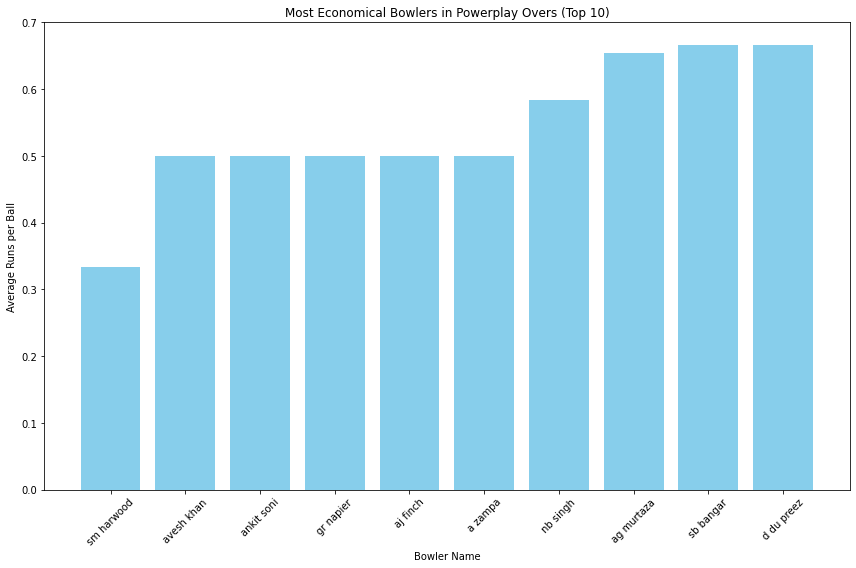

In [0]:

# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10,'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'],top_economical_bowlers['avg_runs_per_ball'],color = 'skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


In [0]:
import seaborn as sns

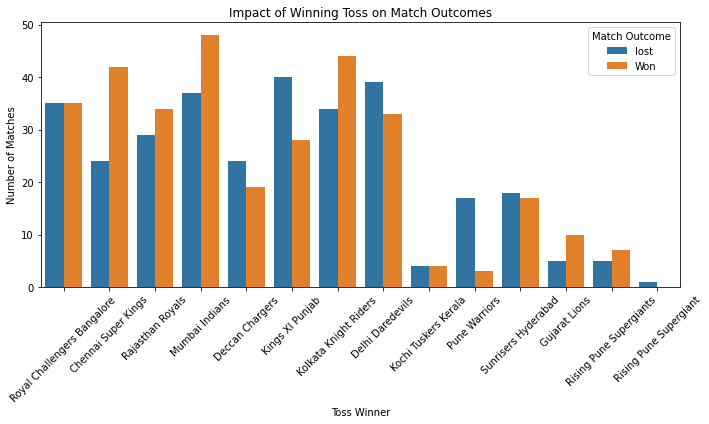

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

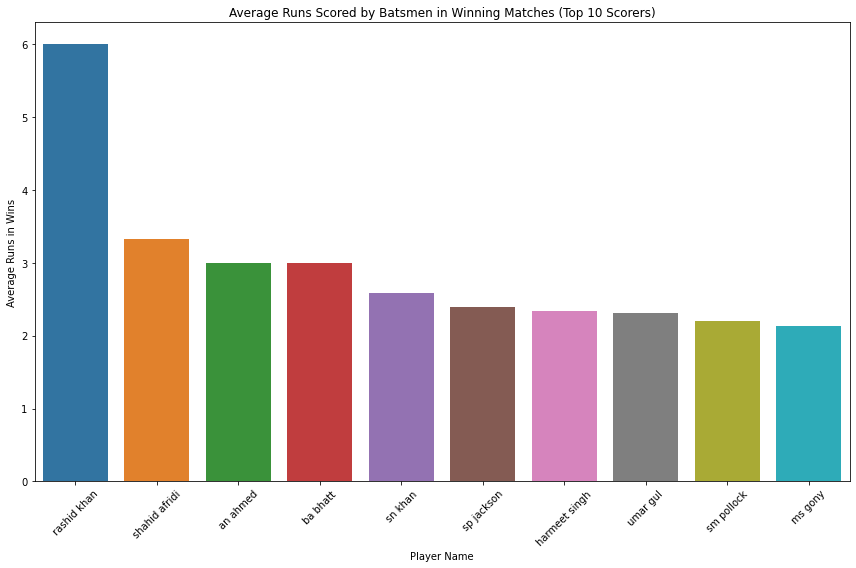

In [0]:

average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


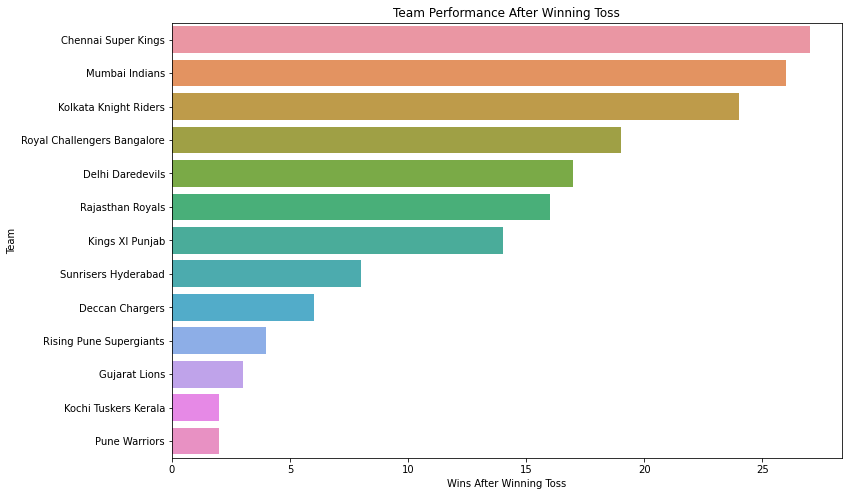

In [0]:

# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()
